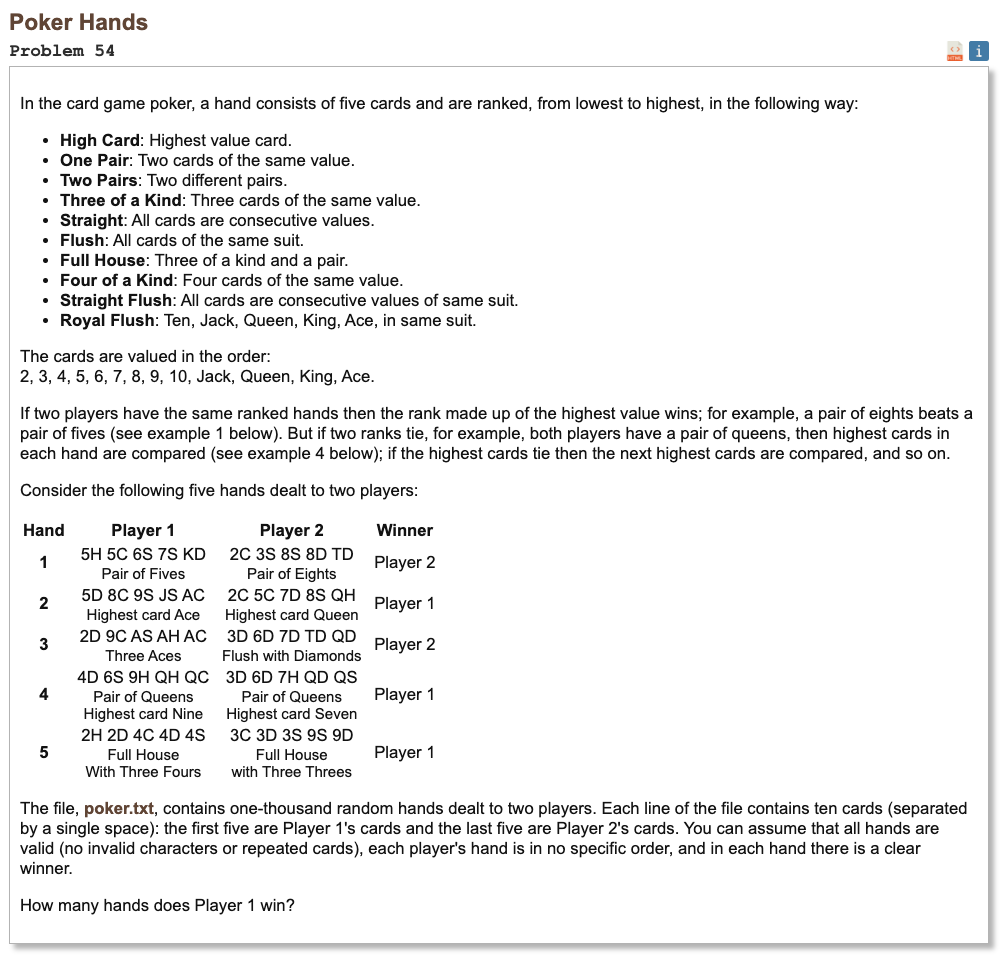

## Initial approach

* write all possible cases for win as a function
* handle understanding hands via helper functions
* for all lines, decide and count the win
* give decision via function


lets try this approach

In [1]:
value_map = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, 
             '7': 7, '8': 8, '9': 9, 'T': 10, 'J': 11, 
             'Q': 12, 'K': 13, 'A': 14}

* read txt file
* convert into list

In [2]:
with open("0054_poker.txt", "r") as file:
    hands = [line.strip().split() for line in file]

len(hands)

1000

* read each card and get value part

In [3]:
def get_values(hand):
    values = []
    
    for card in hand:
        value_char = card[0]
        value_number = value_map[value_char]
        values.append(value_number)
    
    values.sort(reverse=True)
    
    return values

* handle color / suit of the card

In [4]:
def get_suits(hand):
    suits = []
    
    for card in hand:
        suit = card[1]
        suits.append(suit)
    
    return suits

* check special conditions like flush and straight

In [5]:
def is_flush(hand):
    suits = get_suits(hand)
    
    unique_suits = set(suits)
    
    if len(unique_suits) == 1:
        return True
    else:
        return False

def is_straight(values):
    expected_sequence = []
    
    first_value = values[0]
    
    for i in range(5):
        expected_sequence.append(first_value - i)
    
    if values == expected_sequence:
        return True
    else:
        return False

* for all lines, decide winner and count the win

In [6]:
def is_royal_flush(hand):
    values = get_values(hand)
    return is_flush(hand) and values == [14, 13, 12, 11, 10]

def is_straight_flush(hand):
    values = get_values(hand)
    return is_flush(hand) and is_straight(values)

def is_four_of_a_kind(hand):
    values = get_values(hand)
    counts = Counter(values)
    return 4 in counts.values()

def is_full_house(hand):
    values = get_values(hand)
    counts = Counter(values).values()
    return sorted(counts) == [2, 3]

def is_flush_hand(hand):
    return is_flush(hand)

def is_straight_hand(hand):
    values = get_values(hand)
    return is_straight(values)

def is_three_of_a_kind(hand):
    values = get_values(hand)
    counts = Counter(values)
    return 3 in counts.values() and not is_full_house(hand)

def is_two_pairs(hand):
    values = get_values(hand)
    counts = list(Counter(values).values())
    return counts.count(2) == 2

def is_one_pair(hand):
    values = get_values(hand)
    counts = list(Counter(values).values())
    return counts.count(2) == 1 and not is_two_pairs(hand)

def is_high_card(hand):
    return not any([
        is_one_pair(hand), is_two_pairs(hand), is_three_of_a_kind(hand),
        is_straight_hand(hand), is_flush_hand(hand), is_full_house(hand),
        is_four_of_a_kind(hand), is_straight_flush(hand), is_royal_flush(hand)
    ])

In [7]:
def get_hand_score(hand):
    values = get_values(hand)
    counts = Counter(values)

    if is_royal_flush(hand):
        return (10, values)
    elif is_straight_flush(hand):
        return (9, values)
    elif is_four_of_a_kind(hand):
        four = [k for k, v in counts.items() if v == 4][0]
        kicker = [k for k in values if k != four][0]
        return (8, [four, kicker])
    elif is_full_house(hand):
        three = [k for k, v in counts.items() if v == 3][0]
        pair = [k for k, v in counts.items() if v == 2][0]
        return (7, [three, pair])
    elif is_flush_hand(hand):
        return (6, values)
    elif is_straight_hand(hand):
        return (5, values)
    elif is_three_of_a_kind(hand):
        three = [k for k, v in counts.items() if v == 3][0]
        kickers = [k for k in values if k != three]
        return (4, [three] + kickers)
    elif is_two_pairs(hand):
        pairs = sorted([k for k, v in counts.items() if v == 2], reverse=True)
        kicker = [k for k in values if k not in pairs][0]
        return (3, pairs + [kicker])
    elif is_one_pair(hand):
        pair = [k for k, v in counts.items() if v == 2][0]
        kickers = [k for k in values if k != pair]
        return (2, [pair] + kickers)
    else:
        return (1, values)

In [8]:
from collections import Counter

player1_wins = 0

for hand in hands:
    hand1 = hand[:5]
    hand2 = hand[5:]

    score1 = get_hand_score(hand1)
    score2 = get_hand_score(hand2)

    if score1 > score2:
        player1_wins += 1

print(player1_wins)

376
